In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy
import scipy.linalg
%matplotlib inline

1. Решите линейную систему:  

$$ \left[\begin{array}{ccc} 
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9
\end{array}\right] \cdot X = 
\left[\begin{array}{c}
12 \\
2 \\
1
\end{array}\right] $$

In [2]:
A = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

2. Найдите псевдорешение:  

$ x+2y-z = 1 $  
$ 3x-4y = 7 $  
$ 8x-5y+2z = 12 $  
$ 2x-5z = 7 $  
$ 11x+4y-7z = 15 $  

Представим уравнения в матричной форме:  

$$ \left[\begin{array}{ccc} 
1 & 2 & -1 \\
3 & -4 & 0 \\
8 & -5 & 2 \\
2 & 0 & -5 \\
11 & 4 & -7 
\end{array}\right] \cdot X = 
\left[\begin{array}{c}
1 \\
7 \\
12 \\
7 \\
15
\end{array}\right] $$  

In [3]:
A = np.array([[1, 2, -1],
              [3, -4, 0],
              [8, -5, 2],
              [2, 0, -5],
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

3. Сколько решений имеет линейная система:  

$$ \left[\begin{array}{ccc} 
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right] \cdot X = 
\left[\begin{array}{c}
12 \\
2 \\
1
\end{array}\right] $$  

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [4]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A, B.T), axis=1)
print(np.linalg.matrix_rank(A), np. linalg.matrix_rank(C)) 
B[0,0] = 3
C = np.concatenate((A, B.T), axis=1)
print(np.linalg.matrix_rank(A), np. linalg.matrix_rank(C)) 

np.linalg.lstsq(A, B.T, rcond=None)

2 3
2 2


(array([[-1.94444444],
        [-0.11111111],
        [ 1.72222222]]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

4. Вычислите LU-разложение матрицы:  

$$ \left[\begin{array}{ccc} 
1 & 2 & 3 \\
2 & 16 & 21 \\
4 & 28 & 73
\end{array}\right] $$  

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [5]:
A = np.array([[1, 2, 3],
              [2, 16, 21],
              [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
print(P,'\n', L,'\n', U)

B = np.array([[10, 2, 15]])
np.linalg.solve(A, B.T)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]] 
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


array([[12.93055556],
       [-1.67361111],
       [ 0.13888889]])

5. Найдите нормальное псевдорешение недоопределенной системы:  

$ x+2y-z = 1 $  
$ 8x-5y+2z = 12 $  

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [6]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

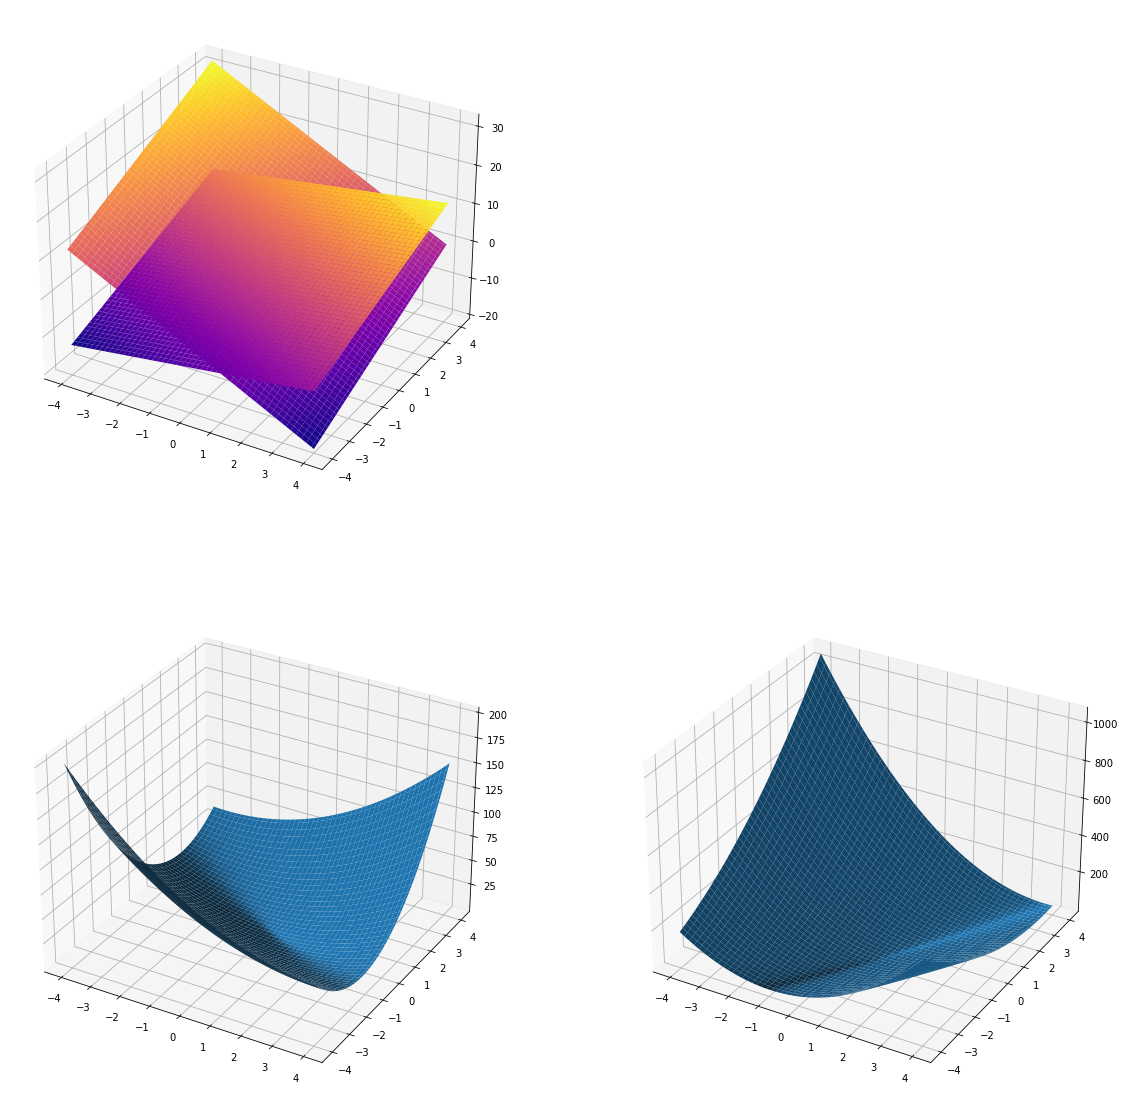

In [7]:
f1 = lambda x, y: x + 2 * y - 1
f2 = lambda x, y: (5 * y - 8 * x + 12) / 2

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(2, 2, 1, projection = '3d')
ax2 = fig.add_subplot(2, 2, 3, projection = '3d')
ax3 = fig.add_subplot(2, 2, 4, projection = '3d')
xval = np.linspace(-4, 4, 100)
yval = np.linspace(-4, 4, 100)
x, y = np.meshgrid(xval, yval)
z = f1(x, y)
surf1 = ax1.plot_surface(x, y, z, rstride = 2, cstride = 2, cmap = cm.plasma)
surf2 = ax2.plot_surface(x, y, Q(x, y, z))
z = f2(x, y)
surf3 = ax1.plot_surface(x, y, z, rstride = 2, cstride = 2, cmap = cm.plasma)
surf4 = ax3.plot_surface(x, y, Q(x, y, z))

In [8]:
A = np.array([[1, 2, -1],
              [8, -5, 2]])
B = np.array([[1, 12]])
np.linalg.lstsq(A, B.T, rcond=None)

(array([[ 1.38191882],
        [-0.18081181],
        [ 0.0202952 ]]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

6. Найдите одно из псевдорешений вырожденной системы:  

$$ \left[\begin{array}{ccc} 
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right] \cdot X = 
\left[\begin{array}{c}
2 \\
5 \\
11
\end{array}\right] $$  

Попробуйте также отыскать и нормальное псевдорешение.

In [9]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [10]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [11]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [12]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [13]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893